# **Cats vs Dogs (Keras CNN using data augmentation)** 



---



In [0]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.getcwd()
os.chdir("./drive/My Drive")
#os.getcwd()

In [0]:
base_dir = os.path.join('/content/drive/My Drive', 'cats_and_dogs_small')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [6]:
train_dir

'/content/drive/My Drive/cats_and_dogs_small/train'

In [7]:
import keras
from keras import layers
from keras import models
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense, Dropout

Using TensorFlow backend.


In [0]:
#Model
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       147584    
__________

In [0]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest', rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150)
                                                    ,batch_size=20,class_mode='binary')
validation_generator = train_datagen.flow_from_directory(val_dir,target_size=(150,150)
                                                    ,batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [13]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/30
100/100 [==============================] - 827s 8s/step - loss: 0.6956 - acc: 0.5265 - val_loss: 0.6864 - val_acc: 0.5840
Epoch 2/30
100/100 [==============================] - 34s 344ms/step - loss: 0.6870 - acc: 0.5460 - val_loss: 0.6762 - val_acc: 0.5800
Epoch 3/30
100/100 [==============================] - 34s 341ms/step - loss: 0.6742 - acc: 0.5725 - val_loss: 0.6790 - val_acc: 0.5770
Epoch 4/30
100/100 [==============================] - 34s 339ms/step - loss: 0.6420 - acc: 0.6300 - val_loss: 0.6706 - val_acc: 0.5910
Epoch 5/30
100/100 [==============================] - 34s 341ms/step - loss: 0.6412 - acc: 0.6280 - val_loss: 0.6227 - val_acc: 0.6520
Epoch 6/30
100/100 [==============================] - 34s 345ms/step - loss: 0.6094 - acc: 0.6630 - val_loss: 0.6152 - val_acc: 0.6580
Epoch 7/30
100/100 [==============================] - 33s 331ms/step - loss: 0.6061 - acc: 0.6665 - val_loss: 0.5961 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 34s

In [0]:
model.save('cats_and_dogs_small_1.h5')

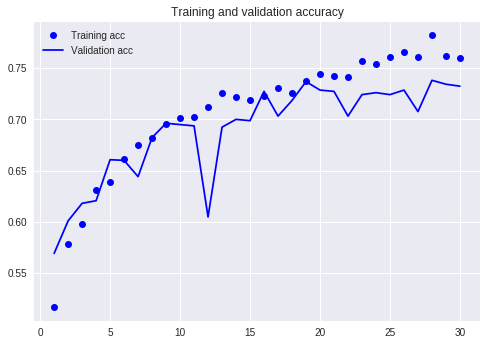

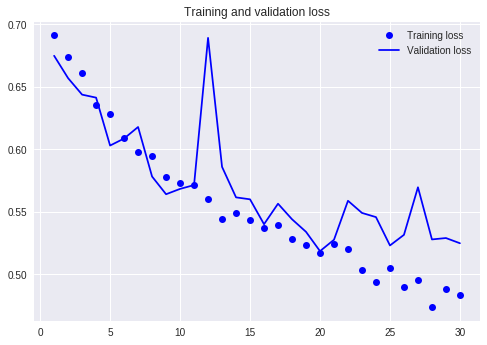

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
test_generator = test_datagen.flow_from_directory(test_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
test_loss, test_acc = model.evaluate_generator(test_generator)
test_loss, test_acc

Found 1000 images belonging to 2 classes.


(0.5179144161939621, 0.752000002861023)